#### ELEC-E8740 Basics of Sensor Fusion <br>
#### Exam 03.12.2021<br>
#### Hoang Nguyen Khac 533263

### 5) Consider a 1D Gaussian random walk model with scalar states xn and measurements yn 
$$
x_n = x_{n-1} + q_{n-1} \\
y_n = x_n + r_n
$$
and 
$$
x_0 \sim N(0,1), q_{n-1} \sim N(0,1), r_n \sim N(0,1) 
$$
Explain how you would use Kalman filter to estimate the states xn from the measurements yn. Feel free to use equations to clarify your answer


- First of all, it is a discrete-time system with the following parameters:
    - $F_n$ = 1
    - $G_n$ = 1
    - E{$x_0$} = $m_0$ = 0, Cov{$x_0$} = $P_0$ = 1
    - E{$q_n$} = 0, Cov{$q_n$} = $Q_n$ = 1
    - E{$r_n$} = 0, Cov{$r_n$} = $R_n$ = 1
- Then Kalman Filter can be applied by the following algorithm:
    - Initialize $\hat{x}_{0|0}$ = $m_0$, $P_{0|0}$ = $P_0$
    - for n = 1,2,... do
    - prediction (time update)
        - $\hat{x}_{n|n-1}$ = $F_n$$\hat{x}_{n-1|n-1}$
        - $P_{n|n-1}$ = $F_n$$P_{n-1|n-1}$$F_n^T$ + $Q_n$
    - measurement update
        - $K_n$ = $P_{n|n-1}$$G_n^T$$(G_nP_{n|n-1}G_n^T + R_n)^{-1}$
        - $\hat{x}_{n|n}$ = $\hat{x}_{n|n-1}$ + $K_n$$(y_n - G_n\hat{x}_{n|n-1})$
        - $P_{n|n}$ = $P_{n|n-1} - K_n(G_nP_{n|n-1}G_n^T +R_n)K_n^T$
    - end for
    
Results of applying Kalman Filter to this system is shown below. The first graph  is the simulation of the system, the second graph is the simulation with Kalman Filter

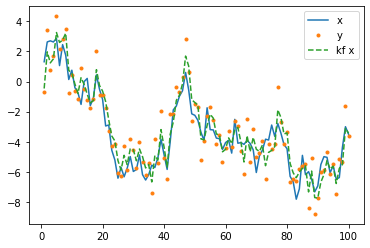

In [2]:
%matplotlib inline
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

Fn = 1

Qn = 1

Gn = 1

Rn = 1

# Simulation
steps = 100
m0 = 0  # Suitable initial mean
P0 = 1 # Suitable initial covariance

T = np.zeros((steps,))
X = np.zeros((steps,1))
Y = np.zeros((steps,1))
q = np.zeros(steps)

x = np.random.normal(m0,P0,1)
t = 0

for n in range(steps):
    q = np.random.normal(0,Qn,1)
    x = Fn * x + q
    r = np.random.normal(0,Rn,1)
    y = Gn * x + r
    t = t + 1
    T[n] = t
    X[n] = x
    Y[n] = y
    
# Kalman Filter
m = m0
P = P0    
kf_m = np.zeros((Y.shape[0],1))
kf_P = np.zeros((Y.shape[0],1))
for n in range(Y.shape[0]):
    # Prediction
    m = Fn * m
    P = Fn * P * Fn + Qn
    # Update
    S = Gn * P * Gn + Rn
    K = P * Gn * (1/S)
    m = m + K * (Y[n] - Gn * m)
    P = P - K * S * K
    kf_m[n] = m
    kf_P[n] = P
    

plt.clf()
plt.plot(T,X,T,Y,'.')
plt.legend(['x','y'])

plt.clf()
plt.plot(T,X,T,Y,'.',T,kf_m,'--')
plt.legend(['x','y','kf x'])